In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

input_data_ordered_raw =  pd.read_csv('rnap_scanned_over_ecoli_genome100k.csv')
sequences = input_data_ordered_raw['seq'].tolist()

In [2]:
input_data_ordered_raw.head()

,Unnamed: 0,val,seq,left,right,ori,contig
0,0,23.9083,CTATTACCTGCCCACGGTAAAGGCGTTCTGGTTGCCCTACG,3695629,3695669,+,MG1655.fa
1,1,23.5831,TTTCTGCCCGCGGCCTGGCAATTGATACCGCCTTGCCATCG,1109059,1109099,+,MG1655.fa
2,2,23.4205,TTTTTACACGCCTTGCGTAAAGCGGCACGGCGCGGGGTGCG,822216,822256,-,MG1655.fa
3,3,23.4098,TTGCTGCCTGGCCGATGGTCTATGCCGCTGCGTTCTCCGGC,772478,772518,+,MG1655.fa
4,4,23.3640,CTTTTACACGCAAAATGCCGTCACGTTCACGGGTCTGGGCT,2748531,2748571,+,MG1655.fa


## Randomly sample vals and seqs to prevent data imbalance

In [3]:
input_data_ordered_raw[['val','seq']].head()

,val,seq
0,23.9083,CTATTACCTGCCCACGGTAAAGGCGTTCTGGTTGCCCTACG
1,23.5831,TTTCTGCCCGCGGCCTGGCAATTGATACCGCCTTGCCATCG
2,23.4205,TTTTTACACGCCTTGCGTAAAGCGGCACGGCGCGGGGTGCG
3,23.4098,TTGCTGCCTGGCCGATGGTCTATGCCGCTGCGTTCTCCGGC
4,23.3640,CTTTTACACGCAAAATGCCGTCACGTTCACGGGTCTGGGCT


In [4]:
# sample high value seqs more
bi = np.random.binomial(n=10000, p=0.01, size=1000)

In [5]:
num_sample = 20000   # number of training samples
test_size = 5000    # number of test samples

#index_random_sample_training_data = np.random.randint(100000,size=(9000))
index_random_sample_training_data = np.random.binomial(n=100000, p=0.01, size=num_sample)
input_data_raw = input_data_ordered_raw[['val','seq']].loc[index_random_sample_training_data]
print(input_data_raw.head())

#index_random_sample_test_data = np.random.randint(100000,size=(1000))
index_random_sample_test_data = np.random.binomial(n=100000, p=0.01, size=test_size)
input_data_raw_test = input_data_ordered_raw[['val','seq']].loc[index_random_sample_test_data]

print(input_data_raw_test.head())

          val                                        seq
957   22.0027  GCCTTCCAGGCTGTTATCAAAGCTGGTCAGTATGCTTACCG
988   21.9895  CCGGTAAACGCTTTGTGCCGATCATTTCTGGCCTGGCTGCC
918   22.0251  GTGCACCACGGTGCCACCCGCGAAATCCAGCGCACCGTGAG
990   21.9892  ACCCAACATGGCCGTCTGGTGAAGACTCTGCTCGGCGGCGA
1026  21.9767  TTGCTCCACAGCGGCCCCAGCACTTTACTGGCGGCAAACAC
          val                                        seq
988   21.9895  CCGGTAAACGCTTTGTGCCGATCATTTCTGGCCTGGCTGCC
991   21.9886  ACGCCCCAGGCTTTTTGCCAGCGCATCCAGCTCTCGCGCTT
1004  21.9841  CTGTTACAGGCACGCTTGAGCCAGGACCTGGCGCGCGAGCA
1023  21.9783  CTTCTCCCCGGCCAAAATGTGGATCAACGGCCTGACCATGC
1012  21.9812  GGCATCCACGCAGTGCAGGCCCTGCTGGAGCGCGCCCCTGA


## Make positive and negative Labels

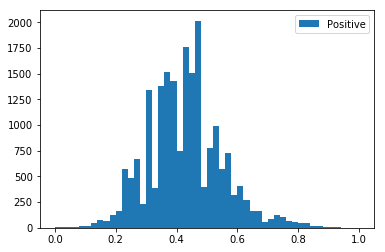

0.5942173479561449

In [6]:
# positive and negative labels
# normalize the following between 0 and 1
pos_labels = np.array(input_data_raw['val'][0:num_sample])
pos_labels = (pos_labels-min(pos_labels))/(max(pos_labels)-min(pos_labels))

# test positive and negative labels
test_pos_labels = np.array(input_data_raw_test['val'][0:test_size])
test_pos_labels = (test_pos_labels-min(test_pos_labels))/(max(test_pos_labels)-min(test_pos_labels))

plt.hist(pos_labels,bins=50,label='Positive')
plt.legend()
plt.show()
# assigned random values to negative examples

pos_labels[0]

In [7]:
sequences = np.array(sequences)

pos = []
pos = list(sequences[index_random_sample_training_data])

test_pos = []
test_pos = list(sequences[index_random_sample_test_data])

pos = np.array(pos)
test_pos = np.array(test_pos)

seq_length = len(pos[0])

## One-hot encoding

In [8]:
temp_pos = []
temp_pos_test = []
for reshape_index in range(len(pos)):
    temp_pos.append(list(pos[reshape_index]))

for reshape_test_index in range(len(test_pos)):
    temp_pos_test.append(list(test_pos[reshape_test_index]))
    
pos = temp_pos
test_pos = temp_pos_test

In [14]:
pos = np.array(pos)
test_pos = np.array(test_pos)

In [15]:
pos_tensor = np.zeros(list(pos.shape) + [4])

test_pos_tensor = np.zeros(list(test_pos.shape) + [4])

base_dict = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

#naive one-hot encoding
for row in range(num_sample):
    for col in range(seq_length):
        pos_tensor[row,col,base_dict[pos[row,col]]] = 1
        if(row<test_size):
            test_pos_tensor[row,col,base_dict[test_pos[row,col]]] = 1

print('Positive sample matrix shape: {}'.format(pos.shape))
# this should be a 3D tensor with shape: (samples, steps, input_dim)
print('Positive sample tensor shape: {}'.format(pos_tensor.shape))

X = pos_tensor
y = pos_labels

X_test = test_pos_tensor
y_test = test_pos_labels

print('Training set shape: {}'.format(X.shape))
print('Training set label shape: {}'.format(y.shape))
print('\nOne-hot encoding looks like:\n {}'.format(X[0,0:10,:]))

Positive sample matrix shape: (20000, 41)
Positive sample tensor shape: (20000, 41, 4)
Training set shape: (20000, 41, 4)
Training set label shape: (20000,)

One-hot encoding looks like:
 [[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


# Define error metrics

In [16]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

## Define Models

In [17]:
#here comes the deep learning part
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Dropout
from keras.activations import relu
from keras.layers.pooling import MaxPooling1D
from keras.optimizers import SGD, Adam

#sanity check for dimensions
#print('Shape of the output of first layer: {}'.format(model.predict_on_batch(pos_tensor[0:1,:,:]).shape))

Using TensorFlow backend.


In [18]:

model = Sequential()
#model.add(Conv1D(1, 19, padding='same', input_shape=(seq_length, 4), activation='relu'))
model.add(Conv1D(10, 41, padding='same', input_shape=(seq_length, 4), activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(10, 20, padding='same', input_shape=(seq_length, 4), activation='relu'))
#model.add(Dropout(0.75))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
#model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])
#model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

#model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_squared_error',r_square])
model.compile(loss='mean_squared_error',optimizer=Adam(lr=0.0001), metrics=[rmse])
#model.compile(loss='mean_squared_error',optimizer=sgd, metrics=[rmse])

#history = model.fit(X, y, validation_split=0.2, epochs=50)  # starts training
history = model.fit(X, y, validation_split=0.3, epochs=25)  # starts training



Train on 14000 samples, validate on 6000 samples
Epoch 1/25
14000/14000 [==============================] - 2s 145us/step - loss: 0.0243 - rmse: 0.1196 - val_loss: 0.0123 - val_rmse: 0.0809
Epoch 2/25
14000/14000 [==============================] - 2s 119us/step - loss: 0.0132 - rmse: 0.0859 - val_loss: 0.0077 - val_rmse: 0.0616
Epoch 3/25
14000/14000 [==============================] - 2s 127us/step - loss: 0.0094 - rmse: 0.0702 - val_loss: 0.0045 - val_rmse: 0.0390
Epoch 4/25
14000/14000 [==============================] - 2s 122us/step - loss: 0.0071 - rmse: 0.0602 - val_loss: 0.0040 - val_rmse: 0.0400
Epoch 5/25
14000/14000 [==============================] - 2s 126us/step - loss: 0.0059 - rmse: 0.0548 - val_loss: 0.0030 - val_rmse: 0.0299
Epoch 6/25
14000/14000 [==============================] - 2s 124us/step - loss: 0.0049 - rmse: 0.0500 - val_loss: 0.0024 - val_rmse: 0.0239
Epoch 7/25
14000/14000 [==============================] - 2s 122us/step - loss: 0.0042 - rmse: 0.0460 - val_los

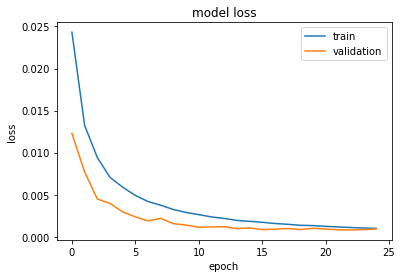

In [19]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [20]:
history.history.keys()

dict_keys(['val_loss', 'val_rmse', 'loss', 'rmse'])

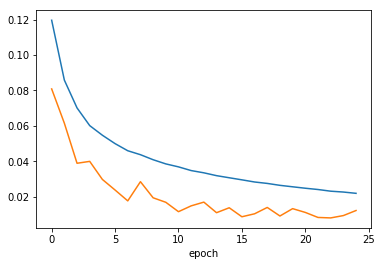

In [21]:
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
#plt.title('model R^2')
#plt.ylabel('R^2')
plt.xlabel('epoch')
#plt.legend(['val_r_sq', 'r_sq'], loc='upper left')
plt.show()


In [22]:
#have a look at the filter
convlayer = model.layers[0]
weights = convlayer.get_weights()[0].squeeze()
print('Convolution parameter shape: {}'.format(weights.shape))

#num2seq = ['A','C','G','T']

#''.join([num2seq[np.argmax(weights[i,:])] for i in range(weights.shape[0])])
#test_pred = ''.join([num2seq[np.argmax(weights[i,:])] for i in range(weights.shape[0])])

Convolution parameter shape: (41, 4, 10)


## Make predictions

In [23]:
model_prediction = model.predict(X_test)

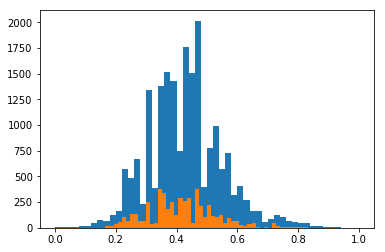

In [24]:
plt.hist(pos_labels,bins=50)
plt.hist(model_prediction,bins=50)
plt.show()

In [25]:
pos_model_prediction = model.predict(test_pos_tensor)

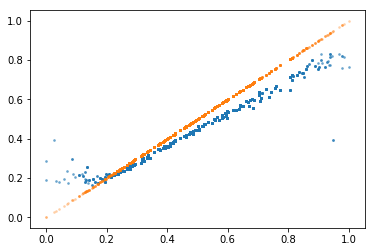

In [26]:
plt.scatter(y_test,pos_model_prediction,s=3,alpha=0.5)
plt.scatter(y_test,y_test,s=3,alpha=0.25)
plt.show()